# Importing Libraries

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

# Defining Headers and Parametes for the Response

In [21]:
HEADERS = ({
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
})

# Defining Dataframe and Dates

In [37]:
fii=pd.DataFrame(columns=['Trading Date', 'Equity', 'Gross Purchases','Gross Sales','Net Investment'])
dii=pd.DataFrame(columns=['Trading Date', 'Equity', 'Gross Purchases','Gross Sales','Net Investment'])

In [36]:
dates_list=["2022-07","2022-06","2022-05","2022-04","2022-03","2022-02","2022-01","2021-12","2021-11","2021-10","2021-09","2021-08","2021-07","2021-06","2021-05","2021-04","2021-03","2021-02","2021-01"]

In [38]:
dates_list 

['2022-07',
 '2022-06',
 '2022-05',
 '2022-04',
 '2022-03',
 '2022-02',
 '2022-01',
 '2021-12',
 '2021-11',
 '2021-10',
 '2021-09',
 '2021-08',
 '2021-07',
 '2021-06',
 '2021-05',
 '2021-04',
 '2021-03',
 '2021-02',
 '2021-01']

# Retreiving Data

In [39]:
for i in dates_list: #Iterating through all the months
    res=requests.get(f"https://api.niftytrader.in/webapi/Stats/fiiCashByMonth?Date={i}", headers=HEADERS) #Fetching the data from nifty trader api
    dict=res.json()['resultData']['data']
    for value in dict: #Storing the data
        if (value['category']=='DII'):
            dii.loc[len(dii)] = [value['created_at'][:10],'Equity',value['buy_value'],value['sell_value'],value['net_value'] ]
        else:
            fii.loc[len(fii)] = [value['created_at'][:10],'Equity',value['buy_value'],value['sell_value'],value['net_value'] ]
                     
        

In [46]:
dii=dii[::-1].reset_index(drop=True)

In [45]:
fii=fii[::-1].reset_index(drop=True)

In [47]:
dii

,Trading Date,Equity,Gross Purchases,Gross Sales,Net Investment
0,2021-01-01,Equity,2505.67,2436.27,69.40
1,2021-01-04,Equity,4575.57,5290.78,-715.21
2,2021-01-05,Equity,5092.00,5582.03,-490.03
3,2021-01-06,Equity,5686.04,6066.45,-380.41
4,2021-01-07,Equity,4815.72,5805.22,-989.50
...,...,...,...,...,...
384,2022-07-15,Equity,5278.66,4219.20,1059.46
385,2022-07-18,Equity,6273.77,5429.44,844.33
386,2022-07-19,Equity,5085.73,5186.46,-100.73
387,2022-07-20,Equity,6032.73,6262.95,-230.22


In [48]:
fii

,Trading Date,Equity,Gross Purchases,Gross Sales,Net Investment
0,2021-01-01,Equity,1072.54,566.33,506.21
1,2021-01-04,Equity,5331.17,3487.95,1843.22
2,2021-01-05,Equity,7039.45,6053.15,986.30
3,2021-01-06,Equity,6733.28,7216.92,-483.64
4,2021-01-07,Equity,8481.77,8099.47,382.30
...,...,...,...,...,...
384,2022-07-15,Equity,5300.67,6950.03,-1649.36
385,2022-07-18,Equity,15055.01,14898.93,156.08
386,2022-07-19,Equity,6177.59,5201.19,976.40
387,2022-07-20,Equity,7606.04,5825.10,1780.94


In [49]:
fii.to_excel('fii.xlsx') #Storing the data as xlsx

In [50]:
dii.to_excel('dii.xlsx')

# Approach to the Solution
#### Step-1: Tried Fetching the table using Beautiful Soup. But the site have have blocked all the contents to webscraper
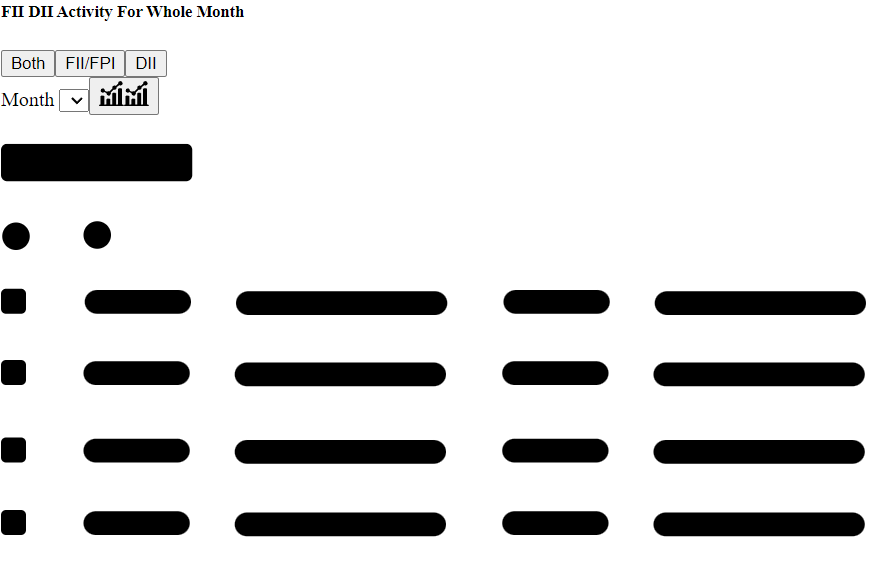
#### Step-2: Looked out for the data sources in Inspect->Network-> Initiator. Found the data files hosted on its website,
#### Step-3: Sent Requests to each file
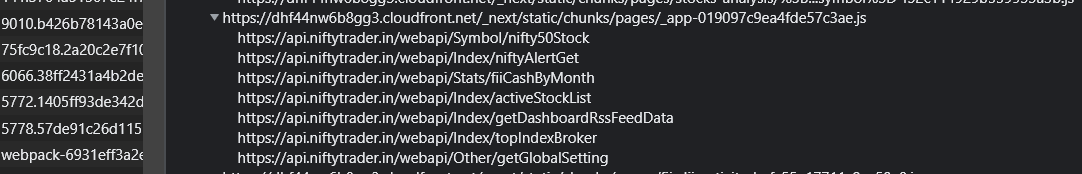